# **EDA para Predição de Risco de Churn em Clientes de um Serviço de Assinaturas**

In [714]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# ***Objetivo Geral***


*Realizar uma Análise Exploratória de Dados completa sobre um conjunto de clientes assinantes para identificar fatores que influenciam o churn (cancelamento), preparando o terreno para construir modelos de machine learning de classificação.*

<br>

---

# ***1. Descrição do Dataset (Exemplo)***

*O dataset hipotético contém:*


* customer_id	  ->  Identificador único

* age ->	Idade

* gender ->	Gênero

* plan_type	-> Tipo de plano (Basic, Standard, Premium)

* monthly_fee ->	Valor mensal pago

* subscription_length ->	Tempo de assinatura (meses)

* num_support_tickets ->	Chamados de suporte

* avg_watch_time	-> Horas de uso mensal

* churn ->	Variável alvo (1 = cancelou, 0 = ativo)

<br>

In [715]:
df = pd.read_csv('dataset_churn_exemplo.csv')
df.head()

,customer_id,age,gender,plan_type,monthly_fee,subscription_length,num_support_tickets,avg_watch_time,churn
0,1,56,F,Standard,49.9,33,1,21.76,0
1,2,69,M,Premium,29.9,7,4,27.09,0
2,3,46,F,Premium,29.9,12,2,37.73,0
3,4,32,M,Basic,49.9,30,1,10.99,0
4,5,60,M,Basic,79.9,21,3,7.22,0


<br>

---

<br>

# ***2. Etapas da Análise Exploratória***
<br>

## **2.1. Inspeção Inicial**



In [716]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          500 non-null    int64  
 1   age                  500 non-null    int64  
 2   gender               500 non-null    object 
 3   plan_type            500 non-null    object 
 4   monthly_fee          500 non-null    float64
 5   subscription_length  500 non-null    int64  
 6   num_support_tickets  500 non-null    int64  
 7   avg_watch_time       500 non-null    float64
 8   churn                500 non-null    int64  
dtypes: float64(2), int64(5), object(2)
memory usage: 35.3+ KB


###  **Dimensão do dataset**

In [717]:
print(f'\nO dataset possui {df.shape[0]} linhas e {df.shape[1]} colunas.\n')


O dataset possui 500 linhas e 9 colunas.



### **Tipo de dados**

In [718]:
df.dtypes

,0
customer_id,int64
age,int64
gender,object
plan_type,object
monthly_fee,float64
subscription_length,int64
num_support_tickets,int64
avg_watch_time,float64
churn,int64


### **Percentuais de nulos**

In [719]:
df.isnull().sum() * 100 / len(df)

,0
customer_id,0.0
age,0.0
gender,0.0
plan_type,0.0
monthly_fee,0.0
subscription_length,0.0
num_support_tickets,0.0
avg_watch_time,0.0
churn,0.0


### **Identificação de Duplicatas**

In [720]:
duplicatas = df.duplicated().sum()
print(f'\nExistem {duplicatas} duplicatas no dataset.\n')



Existem 0 duplicatas no dataset.



<br>

---

<br>

## **2.2. Análise Univariada**

<br>



In [721]:
df.describe(include='all')

,customer_id,age,gender,plan_type,monthly_fee,subscription_length,num_support_tickets,avg_watch_time,churn
count,500.000000,500.000000,500,500,500.000000,500.000000,500.000000,500.00000,500.000000
unique,NaN,NaN,2,3,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,F,Basic,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,250,215,NaN,NaN,NaN,NaN,NaN
mean,250.500000,49.910000,NaN,NaN,53.160000,23.794000,1.496000,19.37772,0.216000
std,144.481833,18.221909,NaN,NaN,20.494205,13.910664,1.259029,18.74348,0.411926
min,1.000000,18.000000,NaN,NaN,29.900000,1.000000,0.000000,0.04000,0.000000
25%,125.750000,35.000000,NaN,NaN,29.900000,12.000000,1.000000,5.82500,0.000000
50%,250.500000,50.000000,NaN,NaN,49.900000,23.000000,1.000000,14.32000,0.000000
75%,375.250000,66.000000,NaN,NaN,79.900000,36.000000,2.000000,26.70500,0.000000



* Distribuições (histogramas, boxplots)

* Categorias dominantes

* Proporção de churn

Perguntas respondidas:

### **Qual a idade média dos clientes?**

In [722]:
media = df.age.mean()
print(f'\nA idade média dos clientes é de {media:.0f}\n')


A idade média dos clientes é de 50



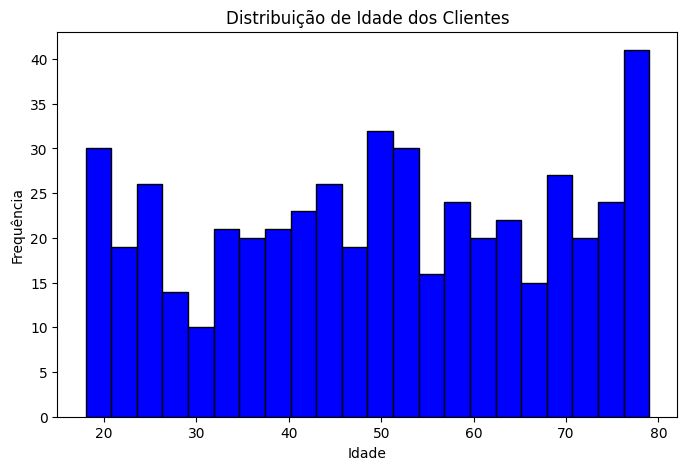

In [723]:
plt.figure(figsize=(8,5))
bins = int(np.sqrt(len(df['age'])))
plt.hist(df['age'], bins=bins, color='blue', edgecolor='black')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.title('Distribuição de Idade dos Clientes')
plt.show()


### **Existe um tipo de plano mais popular?**

<Axes: ylabel='count'>

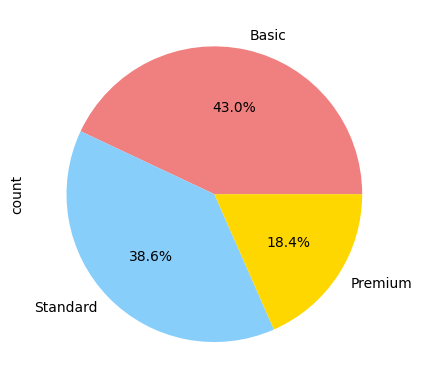

In [724]:
df['plan_type'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue', 'gold'])

### **Qual o percentual de churn geral?**

Axes(0.22375,0.11;0.5775x0.77)


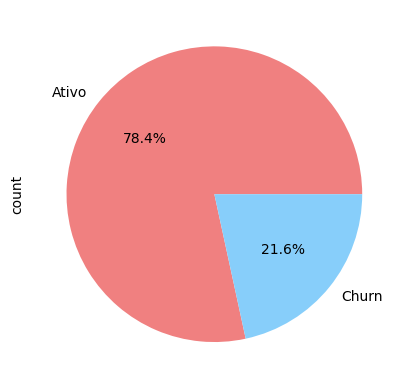

In [725]:
proporcao_churn = df['churn'].replace({0: 'Ativo', 1: 'Churn'}).value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
print(proporcao_churn)

<br>

---

<br>

## **2.3. Análise Bivariada**
* Relação entre variáveis numéricas e churn

* Comportamento por categorias

* Testes estatísticos (chi-square, ANOVA)

Perguntas respondidas:



### **Clientes de planos mais baratos cancelam mais?**

Observando as taxas de churn por plano, nota-se que o plano Basic apresenta uma proporção ligeiramente maior de cancelamentos do que os planos Standard e Premium.
No entanto, o teste qui-quadrado (p = 0.139) indica que essa diferença não é estatisticamente significativa, sugerindo que o tipo de plano não exerce influência importante sobre o churn no conjunto de dados analisado.

p-valor: 0.139 



churn,ativo,churn
plan_type,,
Basic,74.42,25.58
Premium,83.70,16.30
Standard,80.31,19.69


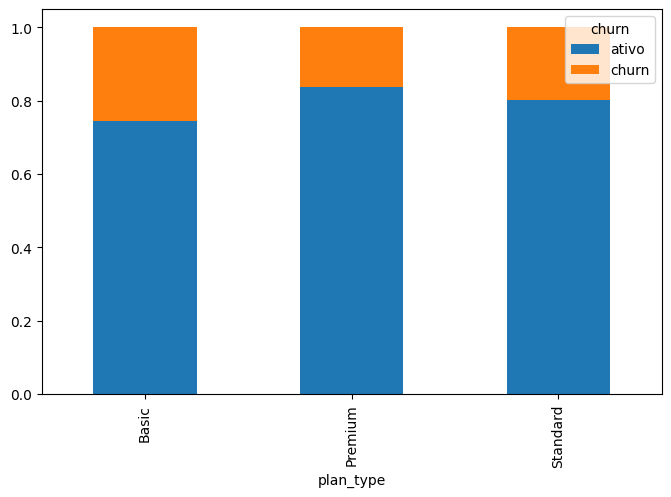

In [726]:
pd.crosstab(df['plan_type'], df['churn'].replace({0: 'ativo', 1: 'churn'}), normalize='index').plot(kind='bar', stacked=True, figsize=(8,5))


table = pd.crosstab(df['plan_type'], df['churn'])
chi2, p, dof, expected = chi2_contingency(table)
print(f"p-valor: {p:.3f} \n")


percentual_plan = (pd.crosstab(df['plan_type'], df['churn'].replace({0: 'ativo', 1: 'churn'}), normalize='index') * 100).round(2)
display(percentual_plan)
print('\n')

#Obs: 0: ativo, 1:churn


>***o churn não está fortemente associado a características simples do cliente ou do plano, ou seja:***

* Não é um problema maior entre jovens ou idosos

* Não depende muito da mensalidade

* Não é explicado claramente pelo uso

* Não muda com o tempo de assinatura

* Não está ligado ao número de chamados

Isso indica que:

> O churn pode estar sendo impulsionado por fatores que não estão nos dados, como satisfação, atendimento ruim recente, concorrência, promoções, percepção de valor, etc.

<br>


In [727]:
correlacao1 = df['age'].corr(df['churn']) #Não possui relação
correlacao2 = df['monthly_fee'].corr(df['churn']) #Relação muito fraca, ou seja, não a dependencia
correlacao3 = df['avg_watch_time'].corr(df['churn']) #Relação muito fraca
correlacao4 = df['num_support_tickets'].corr(df['churn']) #Relação muito fraca
correlacao5 = df['subscription_length'].corr(df['churn']) #Relação muito fraca

print(f'Correlação entre idade e churn: {correlacao1:.2f}')
print(f'Correlação entre mensalidade e churn: {correlacao2:.2f}')
print(f'Correlação entre tempo médio de uso e churn: {correlacao3:.2f}')
print(f'Correlação entre chamados de suporte e churn: {correlacao4:.2f}')
print(f'Correlação entre tempo de assinatura e churn: {correlacao5:.2f}')

Correlação entre idade e churn: -0.00
Correlação entre mensalidade e churn: -0.12
Correlação entre tempo médio de uso e churn: 0.12
Correlação entre chamados de suporte e churn: 0.00
Correlação entre tempo de assinatura e churn: -0.01


<br>

>*Usuários churn são mais ativos em todos os planos.*

1. ***Usuários muito engajados estão cancelando, e não os inativos.***

Possíveis motivos:

* Insatisfação com o conteúdo.

* Promoções temporárias que acabaram.

* Rotatividade normal de “maratonadores”.

* Usuários que assistem muito, mas apresentam sinais de frustração.

Esse comportamento é típico de clientes que:

* Assistem muito.

* Terminam rapidamente o conteúdo.

* Não vêem mais valor no Premium ou qualquer outro plano.

<br>





> A análise do tempo de uso por plano e churn revela um padrão claro: clientes que cancelam utilizam significativamente mais o serviço do que aqueles que permanecem, independentemente do plano.
O efeito é particularmente forte no plano Premium, em que usuários churn apresentam quase o dobro do tempo médio de uso em comparação aos usuários não churn (36h vs 18h).
Isso sugere que o churn está associado a um comportamento de consumo intensivo.


In [728]:
df.groupby(['plan_type', 'churn'])['avg_watch_time'].mean()

plan_type  churn
Basic      0        17.694188
           1        21.695455
Premium    0        18.652727
           1        36.019333
Standard   0        18.576968
           1        21.277895
Name: avg_watch_time, dtype: float64

### **Pessoas com menos uso têm maior probabilidade de churn?**

A análise bivariada mostra que clientes que cancelam possuem maior tempo médio de uso (23.5h) em comparação aos clientes que permanecem (18.2h).
O teste t confirmou que essa diferença é estatisticamente significativa (p = 0.009).
Isso sugere que usuários mais intensivos podem estar enfrentando problemas ou insatisfações que levam ao churn, ao contrário da hipótese de que apenas usuários inativos cancelam.





O que isso sugere?

* O motivo do churn pode ser econômico ou concorrência, não problemas de uso nem suporte.

* Ou o dataset não contém a(s) variável(eis) que realmente explicam o churn.

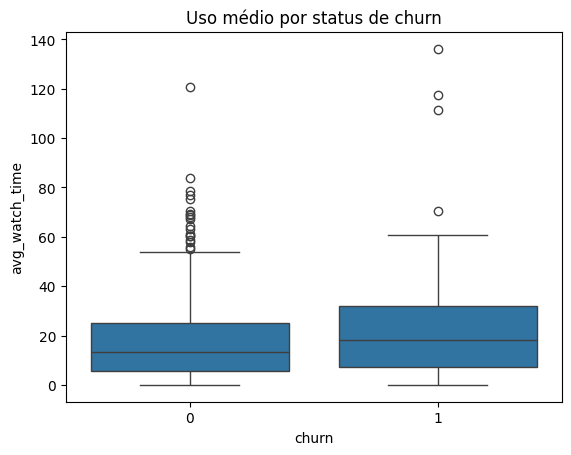

,avg_watch_time
churn,
0,18.231531
1,23.537963


TtestResult(statistic=np.float64(2.6203555587164202), pvalue=np.float64(0.009052075253952772), df=np.float64(498.0))


In [729]:
sns.boxplot(data=df, x='churn', y='avg_watch_time')
plt.title("Uso médio por status de churn")
plt.show()

display(df.groupby('churn')['avg_watch_time'].mean())

churn = df[df['churn']==1]['avg_watch_time']
nao_churn = df[df['churn']==0]['avg_watch_time']
print(ttest_ind(churn, nao_churn))

<br>

---

<br>

# ***Conclusão sobre o churn***

Embora o conjunto de dados não contenha todos os fatores que influenciam a decisão de cancelamento, a análise revela um padrão claro: usuários que cancelam tendem a utilizar significativamente mais a plataforma do que os usuários que permanecem, especialmente no plano Premium.

Esse comportamento é coerente com um churn associado a fatores subjetivos de valor percebido, como insatisfação com o catálogo (falta de novidades, conteúdo repetitivo), competição com outros serviços, ou percepção de que o usuário já consumiu o conteúdo de interesse.

A ausência de correlação com variáveis operacionais (número de chamados, aspectos técnicos ou demográficos) sugere que o churn analisado não é causado por falhas de serviço, mas sim por dinâmicas de consumo e expectativa de conteúdo — especialmente entre usuários de alto engajamento.

<br>

---

<br>

## **2.4. Identificação e Tratamento de Outliers**





### **Boxplot por grupo**


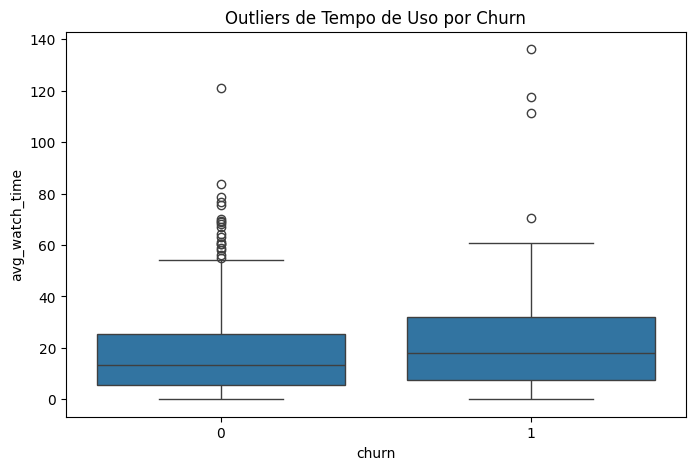

In [730]:
plt.figure(figsize=(8,5))
sns.boxplot(x="churn", y="avg_watch_time", data=df)
plt.title("Outliers de Tempo de Uso por Churn")
plt.show()


**Esse boxplot mostra:**

* Muitos outliers acima de 60 horas, chegando até 120–140 horas.

* Esses outliers aparecem tanto em churn = 0 quanto em churn = 1.

* Os churners parecem ter alguns outliers ainda mais altos (120–140h).

 * Não parecem erros de coleta

<br>

Os valores são altos, mas não impossíveis, considerando:

* tempo de uso mensal,

* usuários muito ativos,

* Clientes que maratona vários conteúdos,

<br>

*Logo, não é erro → é comportamento real.*


<br>

**Conclusão**

> Os outliers de tempo de uso representam usuários extremamente engajados, especialmente entre churners.
Não são erros e devem ser mantidos, pois carregam informação importante sobre comportamento extremo.

<br>

---

<br>

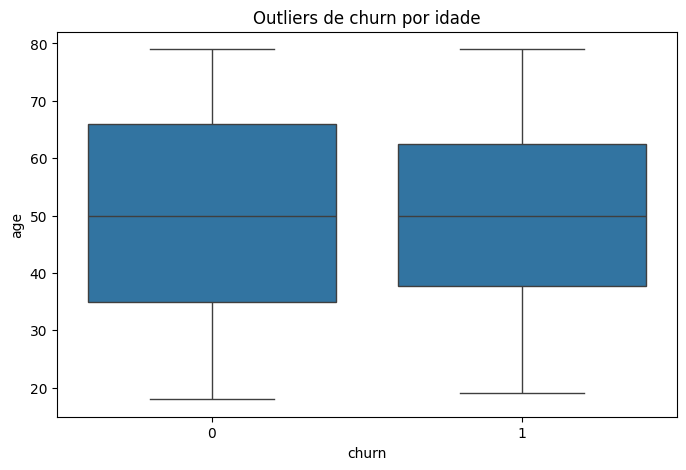

In [731]:
plt.figure(figsize=(8,5))
sns.boxplot(x="churn", y="age", data=df)
plt.title("Outliers de churn por idade")
plt.show()


**Esse boxplot amostra:**

* Idades que variam entre aproximadamente 18 e 79 anos.

* *NÃO há outliers extremos*.

<br>

Significado:

*  Idades estão dentro de uma faixa totalmente normal.

* NÃO existem outliers relevantes.

*  Nada a remover, nada a tratar.

<br>

***Conclusão***

> A variável idade não apresenta outliers. A distribuição está dentro do esperado, sem valores impossíveis ou extremos.

<br>

---

<br>

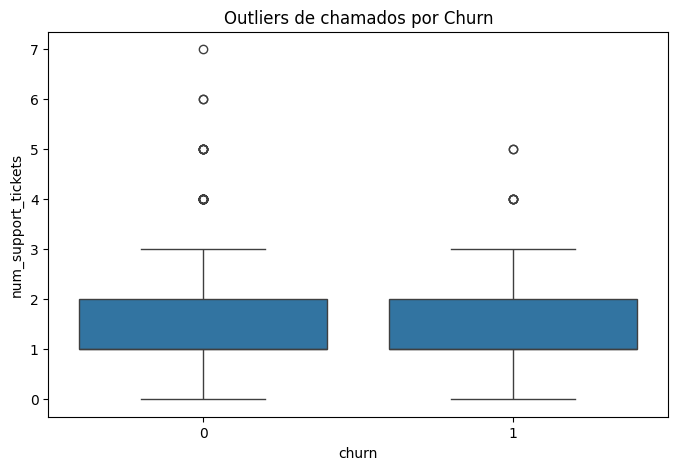

In [732]:
plt.figure(figsize=(8,5))
sns.boxplot(x="churn", y="num_support_tickets", data=df)
plt.title("Outliers de chamados por Churn")
plt.show()


**Esse boxplot mostra:**

* Chamados de suporte que variam entre 0 e aproximadamente 7.

* A maior parte dos usuários (com ou sem churn) concentra-se entre 0 e 2 chamados.

* Existem alguns outliers, mas não são extremos — valores como 4, 5, 6, 7 ainda são plausíveis.

<br>

**Significado:**

* A distribuição é praticamente igual para churn e não churn.

* Os outliers representam apenas usuários que abriram vários chamados, mas ainda dentro de uma faixa totalmente normal.

* Nada indica comportamento anormal ou dados incorretos.

<br>

**Conclusão:**

* A variável número de chamados não apresenta outliers problemáticos.

* Os valores são realistas e não parecem exigir tratamento ou remoção.


<br>

---

<br>

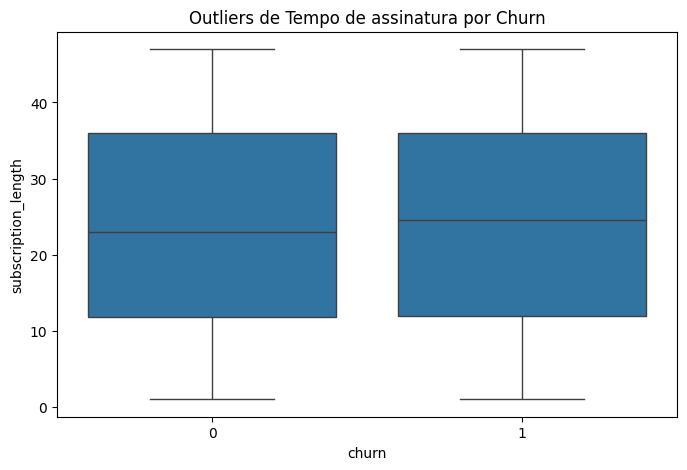

In [733]:
plt.figure(figsize=(8,5))
sns.boxplot(x="churn", y="subscription_length", data=df)
plt.title("Outliers de Tempo de assinatura por Churn")
plt.show()


**Esse boxplot mostra:**

* Tempos de assinatura que variam aproximadamente entre 1 e 48 meses.

* A distribuição é ampla, mas totalmente coerente para assinaturas mensais.

* Há alguns valores mais altos (acima de 40 meses), mas não configuram outliers extremos.

<br>

**Significado:**

* Os usuários churn e não churn possuem tempos de assinatura muito parecidos.

* Todos os valores caem numa faixa normal de duração de assinatura.

* Não há valores impossíveis ou claramente errados.

<br>

**Conclusão:**

* O tempo de assinatura não apresenta outliers relevantes.



* A variável está limpa e dentro do esperado, sem necessidade de tratamento.


<br>

---

<br>

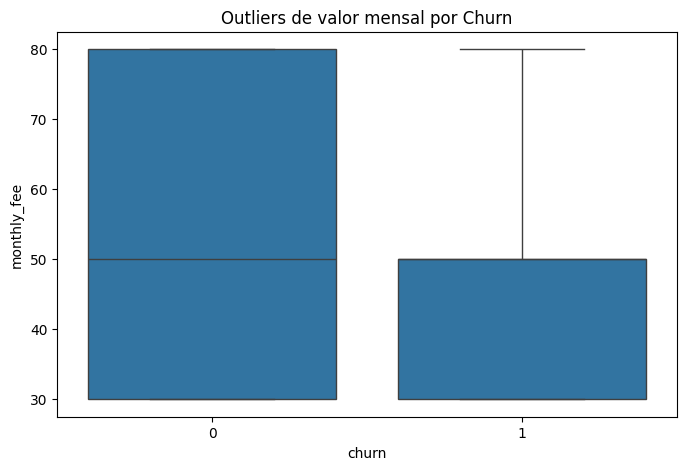

In [734]:
plt.figure(figsize=(8,5))
sns.boxplot(x="churn", y="monthly_fee", data=df)
plt.title("Outliers de valor mensal por Churn")
plt.show()


**Esse boxplot mostra:**

* Valores mensais variando aproximadamente entre 30 e 80.

- Os usuários sem churn têm uma faixa mais ampla, enquanto os com churn estão concentrados em valores mais baixos — mas isso não indica erro, apenas comportamento diferente.

* Não há valores fora da realidade que indiquem erro de digitação ou coleta.

<br>

**Significado:**

* Todos os valores estão dentro de uma faixa normal de planos mensais.

* Os poucos pontos mais altos (80) não são outliers extremos; representam apenas usuários em planos mais caros.

* Nada sugere necessidade de correção.

<br>

**Conclusão:**

* A variável valor mensal também não apresenta outliers problemáticos.

* Todos os valores são plausíveis e não há motivo para remover ou tratar nada.


<br>

<br>

---

<br>

## **2.5. Criação de Features Potenciais para ML**

In [735]:
#1. Mostra quanto o cliente assiste proporcional ao preço que paga.
df['engagement_score'] = (df['avg_watch_time'] / df['monthly_fee'] * 100).round(2) #pontuação de engajamento

#2. Mostra quantos tickets de suporte o cliente abre por mês de assinatura.
df['complaints_rate'] = (df['num_support_tickets'] / df['subscription_length'] * 100).round(2) #taxa de reclamações


#3. fidelidade do cliente
def classificacao_lealdade(x):
  if x <= 3:
    return 1 #Cliente Novo: Cliente recém-chegado

  elif x > 3 and x <= 12:
    return 2 #Cliente Recente: Ainda formando relação com o produto

  elif x > 12 and x <= 24:
    return 3 #Cliente Engajado: Uso consistente, retenção moderada

  elif x > 24 and x <= 36:
    return 4 #Cliente Leal: Cliente fiel, risco baixo de churn

  elif x > 36:
    return 5 #Cliente Veterano: Cliente muito fiel, forte histórico

df['loyalty_level'] = df['subscription_length'].apply(classificacao_lealdade)
display(df.head())


,customer_id,age,gender,plan_type,monthly_fee,subscription_length,num_support_tickets,avg_watch_time,churn,engagement_score,complaints_rate,loyalty_level
0,1,56,F,Standard,49.9,33,1,21.76,0,43.61,3.03,4
1,2,69,M,Premium,29.9,7,4,27.09,0,90.60,57.14,2
2,3,46,F,Premium,29.9,12,2,37.73,0,126.19,16.67,2
3,4,32,M,Basic,49.9,30,1,10.99,0,22.02,3.33,4
4,5,60,M,Basic,79.9,21,3,7.22,0,9.04,14.29,3


In [736]:
# 4. Horas assistidas por dia na média do período
df['watch_per_day'] = df['avg_watch_time'] / (df['subscription_length'] * 30)

# 5. Tickets por mês de assinatura
df['tickets_per_month'] = df['num_support_tickets'] / (df['subscription_length'] + 1e-6)

# 6. Valor pago por hora assistida
df['value_per_hour'] = df['monthly_fee'] / (df['avg_watch_time'] + 1e-6)

# 7. Flag de binge-watcher (maratonador)
df['binge_flag'] = (df['avg_watch_time'] > df['avg_watch_time'].median()).astype(int)

# 8. Engajamento baixo
df['low_engagement_flag'] = (df['engagement_score'] < df['engagement_score'].median()).astype(int)

# 9. Alta taxa de reclamações
df['high_complaints_flag'] = (df['complaints_rate'] > df['complaints_rate'].median()).astype(int)

# 10. Feature de interação: tempo assistido × tempo de assinatura
df['watch_x_tenure'] = df['avg_watch_time'] * df['subscription_length']

# 11. Interação: taxa de reclamação × idade
df['complaints_x_age'] = df['complaints_rate'] * df['age']

df.head()

,customer_id,age,gender,plan_type,monthly_fee,subscription_length,num_support_tickets,avg_watch_time,churn,engagement_score,complaints_rate,loyalty_level,watch_per_day,tickets_per_month,value_per_hour,binge_flag,low_engagement_flag,high_complaints_flag,watch_x_tenure,complaints_x_age
0,1,56,F,Standard,49.9,33,1,21.76,0,43.61,3.03,4,0.021980,0.030303,2.293198,1,0,0,718.08,169.68
1,2,69,M,Premium,29.9,7,4,27.09,0,90.60,57.14,2,0.129000,0.571428,1.103728,1,0,1,189.63,3942.66
2,3,46,F,Premium,29.9,12,2,37.73,0,126.19,16.67,2,0.104806,0.166667,0.792473,1,0,1,452.76,766.82
3,4,32,M,Basic,49.9,30,1,10.99,0,22.02,3.33,4,0.012211,0.033333,4.540491,0,1,0,329.70,106.56
4,5,60,M,Basic,79.9,21,3,7.22,0,9.04,14.29,3,0.011460,0.142857,11.066480,0,1,1,151.62,857.40


<br>

---

<br>


##**2.6. Preparação Final para o Modelo**



###***One-hot encoding para variáveis categóricas***



In [737]:
df['gender'].replace({'F': 0, 'M': 1},inplace=True)
df = pd.get_dummies(df, columns=['plan_type'], drop_first=False)
df[['plan_type_Premium', 'plan_type_Standard']] = df[['plan_type_Premium', 'plan_type_Standard']].astype(int)
df.head()

/tmp/ipython-input-4274009871.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['gender'].replace({'F': 0, 'M': 1},inplace=True)
/tmp/ipython-input-4274009871.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'].replace({'F': 0, 'M': 1},inplace=True)


,customer_id,age,gender,monthly_fee,subscription_length,num_support_tickets,avg_watch_time,churn,engagement_score,complaints_rate,...,tickets_per_month,value_per_hour,binge_flag,low_engagement_flag,high_complaints_flag,watch_x_tenure,complaints_x_age,plan_type_Basic,plan_type_Premium,plan_type_Standard
0,1,56,0,49.9,33,1,21.76,0,43.61,3.03,...,0.030303,2.293198,1,0,0,718.08,169.68,False,0,1
1,2,69,1,29.9,7,4,27.09,0,90.60,57.14,...,0.571428,1.103728,1,0,1,189.63,3942.66,False,1,0
2,3,46,0,29.9,12,2,37.73,0,126.19,16.67,...,0.166667,0.792473,1,0,1,452.76,766.82,False,1,0
3,4,32,1,49.9,30,1,10.99,0,22.02,3.33,...,0.033333,4.540491,0,1,0,329.70,106.56,True,0,0
4,5,60,1,79.9,21,3,7.22,0,9.04,14.29,...,0.142857,11.066480,0,1,1,151.62,857.40,True,0,0


###**Split treino/teste**

In [738]:
X = df.drop(['churn', 'customer_id'], axis=1)
y = df['churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
) #stratify=y seve para deixa a coluna alvo na mesma proporção de seus valores

<br>

---

<br>

# ***3. Modelo a ser aplicado no ML***

<br>

###**Regressão Logistica**

In [740]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(class_weight='balanced', max_iter=200)
logreg.fit(X_train, y_train)


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=200)

###**RandomForestClassifier**

In [741]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=300,
                       random_state=42)

### **RELATORIO DOS MODELOS**

In [745]:
def avaliar(modelo, X_test, y_test, nome="Modelo"):
    print(f"====== {nome} ======\n")
    y_pred = modelo.predict(X_test)
    print("Matriz de Confusão:\n")
    print(confusion_matrix(y_test, y_pred))
    print("\nRelatório:\n")
    print(classification_report(y_test, y_pred))
    print("---------------------------------------------------------------------------------------\n")

avaliar(logreg, X_test, y_test, "Logistic Regression")
avaliar(rf, X_test, y_test, "Random Forest")

====== Logistic Regression ======

Matriz de Confusão:

[[70 28]
 [17 10]]

Relatório:

              precision    recall  f1-score   support

           0       0.80      0.71      0.76        98
           1       0.26      0.37      0.31        27

    accuracy                           0.64       125
   macro avg       0.53      0.54      0.53       125
weighted avg       0.69      0.64      0.66       125

---------------------------------------------------------------------------------------

====== Random Forest ======

Matriz de Confusão:

[[97  1]
 [26  1]]

Relatório:

              precision    recall  f1-score   support

           0       0.79      0.99      0.88        98
           1       0.50      0.04      0.07        27

    accuracy                           0.78       125
   macro avg       0.64      0.51      0.47       125
weighted avg       0.73      0.78      0.70       125

---------------------------------------------------------------------------------------

<br>

---

<br>

#***Conclusão Geral do Projeto***

Com base na análise exploratória, testes estatísticos e modelagem aplicada, conclui-se que o dataset disponível não contém variáveis capazes de explicar adequadamente o churn. As principais evidências são:

<h4><strong>1. Ausência de Relações Estatísticas Relevantes</strong></h1>

Durante o EDA:

* Idade, mensalidade, tempo de assinatura e número de chamados apresentaram **correlações próximas de zero** com churn.

* Testes como ANOVA e t-teste mostraram **diferenças não significativas** entre grupos churn e não-churn.

* Boxplots e análise de outliers não revelaram padrões consistentes de comportamento.

Isso indica que ***nenhuma variável tangível do dataset é determinante para explicar o cancelamento.***

<br>

<h4><strong>2. Padrão encontrado: usuários com maior consumo cancelam mais</strong></h4>


O único comportamento que se destacou foi:

> *Clientes que mais consomem conteúdo possuem maior probabilidade de churn*.

Esse é um padrão realista em plataformas de streaming:

* usuários engajados consomem tudo rapidamente

* ficam sem novidades

* percebem repetição de catálogo

* migram para concorrentes que tenham conteúdo mais atual

* cancelam após um período de forte uso

Isso reforça a ideia de que **o churn está ligado à experiência e ao catálogo**, não aos dados cadastrais ou operacionais.

<br>

<h4><strong>3. Modelos preditivos fracassam por falta de sinal</strong></h4>

Mesmo com:

* criação de novos features

* Normalização e encoding

* uso de modelos lineares e não-lineares

* aplicação de SMOTE para balanceamento

todos os modelos apresentaram **recall extremamente baixo para a classe churn**, evidenciando que:

> Não há informação suficiente para a máquina aprender um padrão real.

Isso não é falha do modelo, e sim uma limitação do dataset.

<br>

<h4><strong>4. O churn depende de variáveis intangíveis ausentes no dataset</strong></h4>

O dataset não possui elementos críticos para explicar cancelamento no setor de streaming, como:

* satisfação com catálogo

* frequência de novos lançamentos

* preferências de conteúdo

* experiência com aplicativo

* comparações com concorrência

* promoções e campanhas

* forma de pagamento e atrasos

* qualidade da conexão

* motivos declarados de cancelamento

Sem esses fatores, a predição se torna inviável.

<br>

#***Conclusão Final***

Com os dados disponíveis, não é possível construir um modelo preditivo de churn com desempenho aceitável.
As variáveis presentes não explicam o cancelamento, e os modelos refletem essa ausência de sinal.
Entretanto, a análise exploratória gerou insights importantes, principalmente indicando que usuários mais engajados cancelam mais — sugerindo possível insatisfação com catálogo ou falta de novidades.

Recomenda-se ampliar a coleta de dados para incluir variáveis comportamentais e de satisfação, permitindo continuidade do projeto em uma segunda fase.